<a href="https://colab.research.google.com/github/lmkwytnicholas/nic.github.io/blob/master/collabFilteringNlpBookRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Access & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
users=pd.read_csv('/content/drive/MyDrive/Tech I.S./00 Datasets/BX-Users.csv',
                  sep=';',
                  error_bad_lines=False,
                  encoding='latin-1')
users.columns=['userID','Location','Age']
print('Dimension of users dataset:',users.shape)
users.head()

Dimension of users dataset: (278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
books=pd.read_csv('/content/drive/MyDrive/Tech I.S./00 Datasets/BX-Books.csv', 
                  sep=';',
                  error_bad_lines=False,
                  encoding='latin-1')
books.columns=['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 
              'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
print('Dimension of books dataset:',books.shape)
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


Dimension of books dataset: (271360, 8)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings=pd.read_csv('/content/drive/MyDrive/Tech I.S./00 Datasets/BX-Book-Ratings.csv',
                    sep=';',
                    error_bad_lines=False,
                    encoding='latin-1')
ratings.columns=['userID', 'ISBN', 'bookRating']
ratings.head()
ratings.value_counts()
# ratings.info()

userID  ISBN        bookRating
278854  0553579606  8             1
94923   0671579010  0             1
        0671525743  0             1
        0671527215  8             1
        0671547798  0             1
                                 ..
187762  0786918047  10            1
        0786916095  10            1
        0786915897  10            1
        0786915749  10            1
2       0195153448  0             1
Length: 1149780, dtype: int64

0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: bookRating, dtype: int64
--------------------------------------------------


Text(0.5, 1.0, 'Score Distribution')

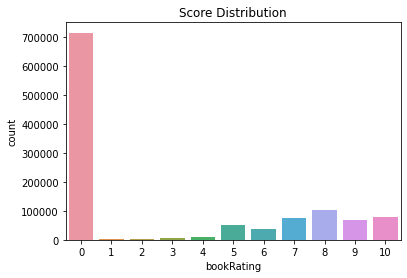

In [5]:
# Value count for each rating
print(ratings['bookRating'].value_counts(sort=False))
print('-'*50)

# Count plot for Rating
sns.countplot('bookRating',data=ratings)
plt.title('Score Distribution')

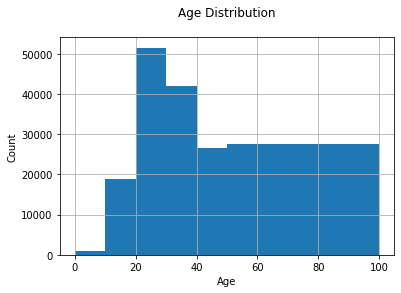

In [6]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [7]:
# Exclude users with less than 200 ratings and books with less than 100 ratings
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

print("Updated Dimension of ratings dataset:",ratings.shape)

Updated Dimension of ratings dataset: (527556, 3)


In [8]:
# Merge rating and book datasets
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [9]:
# Groupby book titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.groupby(by = ['bookTitle'])['bookRating'].count().reset_index().
                     rename(columns = {'bookRating': 'totalRatingCount'})[['bookTitle', 'totalRatingCount']])

book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [10]:
# Merge combine_book_ratingwith the book_ratingCount, which will give
# exactly what we need to find out which books are popular and filter
# out lesser-known books

rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, 
                                                         left_on = 'bookTitle',
                                                         right_on = 'bookTitle', 
                                                         how = 'left')

rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [11]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print('rating_popular_book shape:',rating_popular_book.shape)
rating_popular_book.head()

rating_popular_book shape: (62149, 5)


,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [12]:
# Merge rating_popular_book and users dataset
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
print(combined.shape)
combined.head()

(62149, 7)


,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa",48.0
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa",29.0
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82,"n/a, n/a, n/a",NaN
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa",18.0
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa",32.0


In [13]:
combined.isna().sum()

userID                  0
ISBN                    0
bookRating              0
bookTitle               0
totalRatingCount        0
Location                0
Age                 14004
dtype: int64

In [14]:
# Filter for users in US and Canada only 
us_canada_user_rating = combined[combined['Location'].str.contains('us|canada')]
us_canada_user_rating = us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


#kNN Implementation
1. Convert table to a 2D Matrix
2. Impute missing values with zeros because we will be calculating distances between rating vectors
3. Transform thevalues(ratings) of the matrix dataframe into a `scipy sparse` matrix
4. Find Nearest Neighbors using unsupervised algorithms from `sklearn.neighbors`
  * `brute` type algorithm
  * `metric = cosine`
5. Fit model

In [15]:
# Convert table to a 2D Matrix using .pivot()
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID','bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index='bookTitle',
                                                          columns='userID',
                                                          values='bookRating').fillna(0)
us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11993,12538,12824,13082,13273,13552,13850,14422,14521,15408,15957,16106,16634,16795,16916,...,262399,262998,263163,263460,263877,264031,264082,264321,264637,265115,265313,265889,266056,266226,266753,266865,267635,268032,268110,268330,268622,268932,269566,269719,269890,270713,270820,271195,271284,271448,271705,273979,274061,274301,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [16]:
# Transform values(ratings) of matrix DataFrame into a scipy sparse matrix
us_canada_user_rating_matrix=csr_matrix(us_canada_user_rating_pivot.values)
us_canada_user_rating_matrix

<746x767 sparse matrix of type '<class 'numpy.float64'>'
	with 13291 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [18]:
query_index=73
print(us_canada_user_rating_pivot.index[query_index])

distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
print('Distances:',distances,'\nIndices:',indices)

Beloved (Plume Contemporary Fiction)
Distances: [[0.         0.78302272 0.78473339 0.78669745 0.79993935 0.80144779]] 
Indices: [[ 73 160 714 571 675  28]]


In [19]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Beloved (Plume Contemporary Fiction):

1: Dolores Claiborne, with distance of 0.7830227183724876:
2: Watership Down, with distance of 0.7847333889757289:
3: The God of Small Things, with distance of 0.7866974530375965:
4: The Weight of Water : A Novel Tag: Author of Resistance and Strange Fits of Passion, with distance of 0.7999393474206367:
5: A Widow for One Year, with distance of 0.8014477868862702:
